<center><img src="https://polytech.univ-lyon1.fr/uas/polytech/LOGO/UDL_logo_blanc-01%20(2).png" alt="drawing" style="width:100px;"/></center>

# Introduction à Python pour la Data Science

## Unsupervised Learning : Réduction de dimension & clustering

## Introduction

### Objectifs
L'objectif de se TP est de découvrir deux applications de l'apprentissage non supervisé : la réduction de dimension et le clustering. 

Un objectif secondaire est l'introduction à la librairie `scikit-learn`. 

### Fonctions de `scikit-learn`
La communauté qui développe cette librairie est très active, elle évolue rapidement. Ne pas hésiter à consulter la [documentation](http://scikit-learn.org/stable/index.html) pour des compléments. Voici une sélection de ses principales fonctionnalités.
- Transformations (standardisation, discrétisation binaire, regroupement de modalités, imputations rudimentaires de données manquantes) , "vectorisation" de corpus de textes (encodage, catalogue, Tf-idf), images.
- Exploration: ACP, classification non supervisée (mélanges gaussiens, propagation d'affinité, ascendante hiérarchique, SOM,...). .
- Modélisation et apprentissage.

Consultez la [documentation](http://scikit-learn.org/stable/user_guide.html) et ses nombreux [exemples](http://scikit-learn.org/stable/auto_examples/index.html) pour plus de détails sur l'utilisation de `scikit-learn`. 

In [ ]:
#Run this cell if sklearn is not installed
%pip install scikit-learn

## I. Réduction de dimension
### ACP

La librairie `scikit-learn` a principalement été conçu pour le traitement du signal. Aussi, de nombreuses options de l'ACP ne sont pas disponibles, notamment les graphiques usuels (biplot, cercle des corrélations...). En revanche des résultats sont liés à la version probabiliste de l'ACP sous hypothèse d'une distribution gaussienne multidimensionnelle des données. 

**Attention**, l'ACP est centrée mais par réduite. L'option n'est pas prévue et les variables doivent être réduites avant si c'est nécessaire.

D'autres versions d'analyse en composantes principales sont proposées dans `Scikit-learn`: *kernel PCA, sparse PCA, ICA*...

In [ ]:
# Import necessary libraries and function here

#### Question 1 : 
- Importez le dataset wine de sklearn à l'aide la fonction [`load_wine()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
- Faites une [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) en utilisant 2 composantes (pour l'affichage)
- Affichez la projection. 

#### Question 2:
- Même question, mais cette fois utilisez la fonction `sklearn.preprocessing.StandardScaler` avant de faire la PCA pour reduire les données.
- Quelles sont les différences ? 

#### Question 3:
- Faites une PCA en utilisant cette fois 5 composantes.
- Tracez la variances expliquez pour chaques composantes.

### t-SNE

t-SNE est une méthode de réduction de dimensionnalité qui vise à préserver les relations de proximité entre les points de données dans un espace réduit, souvent à 2 ou 3 dimensions. Elle est efficace pour visualiser des données complexes, mais peut être lente et moins précise pour de grands ensembles de données, car elle met l’accent sur les structures locales au détriment des relations globales. Contrairement à la PCA, qui est une méthode linéaire, t-SNE est non linéaire et peut donc capturer des structures beaucoup plus complexes dans les données, comme des courbes ou des clusters non linéaires.

In [ ]:
# Import the necessary libraries and function here


#### Question 4 : 
- Toujours sur le même dataset utilisez [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE) afin de faire la réduction de dimension avec et sans rescaling.

### 2.3 UMAP

UMAP est une autre méthodes de réduction de dimension non-lineaire qui préserve à la fois les structures locales et globales des données. Basée sur la topologie et la géométrie des variétés, elle est particulièrement adaptée aux grands ensembles de données et est souvent préférée à t-SNE pour sa capacité à maintenir la structure globale.

In [ ]:
#Run this this cell the first time to install umap's librarie
%pip install umap-learn

In [ ]:
# Import the necessary libraries and function here
import umap.umap_ as umap

#### Question 5 : 
- Toujours sur le même dataset utilisez UMAP afin de faire la réduction de dimension avec et sans rescaling.

## 3 Clustering
Le clustering est une méthode de machine learning *non supervisé* qui consiste à regrouper un ensemble d'objets en sous-ensembles, appelés clusters, de sorte que les objets au sein d’un même cluster soient plus similaires entre eux. La tache supervisé équivalentes est la classification. 

Dans cette parties, nous allons travailler sur le dataset MNIST (Modified National Institute of Standards and Technology), une référence incontournable en apprentissage automatique. Il se compose de 70 000 images en niveaux de gris représentant des chiffres manuscrits de 0 à 9, dont 60 000 sont utilisées pour l'entraînement et 10 000 pour les tests. Chaque image est de petite taille, 28×28 pixels, ce qui le rend facile à manipuler et rapide à traiter. 

In [ ]:
#Run this cell to install tensorflow the first time
%pip install tensorflow

In [8]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

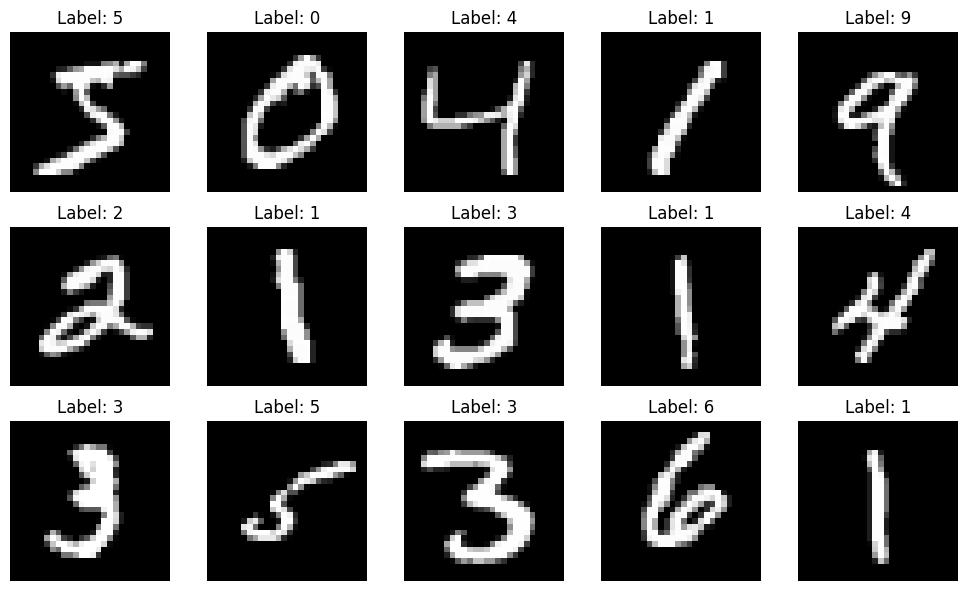

In [9]:
# Load MNIST dataset
(train_images, train_labels), _ = mnist.load_data()

# Set up the plot grid (3 rows, 5 columns)
fig, axes = plt.subplots(3, 5, figsize=(10, 6))

# Loop through the first 15 images and labels
for i in range(3):
    for j in range(5):
        ax = axes[i, j]
        ax.imshow(train_images[i * 5 + j], cmap='gray')
        ax.set_title(f"Label: {train_labels[i * 5 + j]}")
        ax.axis('off')  # Hide axis

plt.tight_layout()
plt.show()


### k-means

#### Question 6:
- Faites une PCA avec deux composantes.
- Utilisez l'algorithm [KMeans]https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html de sklearn sur les données en dimensions réduites. 
- Comparez les clusters avec les vrais labels.


#### Question 7:
- Faites une reduction de dimension en utilisant UMAP.
- Utilisez l'algorithm [KMeans]https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html de sklearn sur les données en dimensions réduites. 
- Comparez les clusters avec les vrais labels.
- Comparez vos résultats avec la PCA, pourquoi est-ce différent ? 